<a href="https://colab.research.google.com/github/sunilkumar1762/Jar_Assignment/blob/main/Jar_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:

file_path = '/content/Walmart_Sales_CB1799BACC_77EAC63B5D.xlsx'
df = pd.read_excel(file_path)
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [37]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB
None


In [38]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


In [39]:
# A. Analyze the performance of sales and revenue at the city and branch level

# total sales (revenue) for each transaction
df['Total'] = df['Unit price'] * df['Quantity']

# Group by City and Branch and calculate the total revenue
sales_by_city_branch = df.groupby(['City', 'Branch'])['Total'].sum().reset_index()
print("Sales and Revenue by City and Branch:")
print(sales_by_city_branch)


Sales and Revenue by City and Branch:
        City Branch     Total
0   Mandalay      A  34130.09
1   Mandalay      B  37215.93
2   Mandalay      C  29794.62
3  Naypyitaw      A  35985.64
4  Naypyitaw      B  35157.75
5  Naypyitaw      C  34160.14
6     Yangon      A  33647.27
7     Yangon      B  35193.51
8     Yangon      C  32302.43


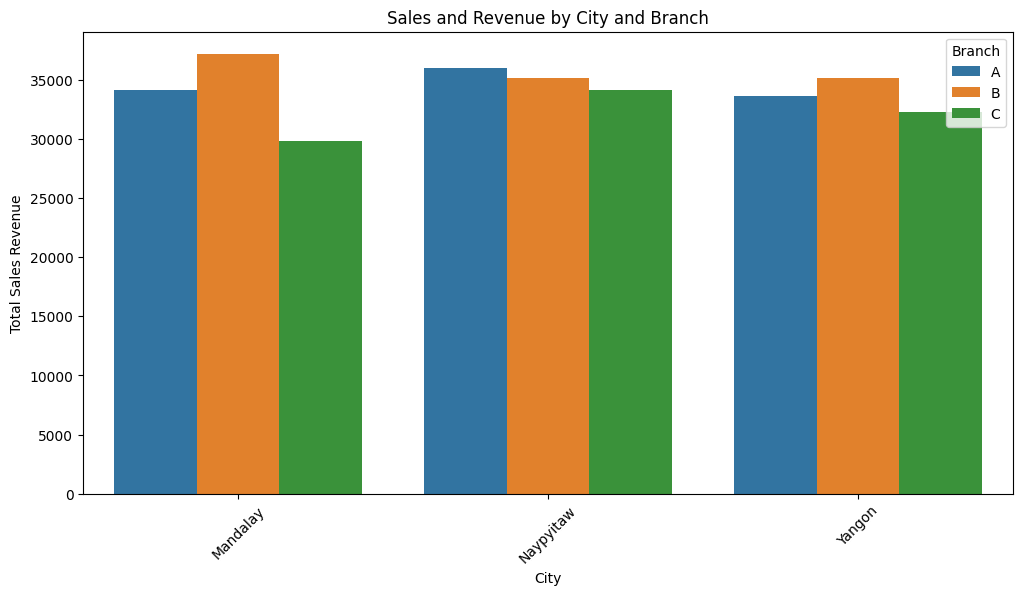

In [40]:
# sales and revenue by city and branch
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_city_branch, x='City', y='Total', hue='Branch')
plt.title('Sales and Revenue by City and Branch')
plt.xlabel('City')
plt.ylabel('Total Sales Revenue')
plt.legend(title='Branch')
plt.xticks(rotation=45)
plt.show()


In [41]:
# What is the average price of an item sold at each branch of the city ?

average_price_per_branch_city = df.groupby(['City', 'Branch'])['Unit price'].mean().reset_index()
average_price_per_branch_city.rename(columns={'Unit price': 'Average Unit Price'}, inplace=True)
print(average_price_per_branch_city)

        City Branch  Average Unit Price
0   Mandalay      A           53.353866
1   Mandalay      B           56.133305
2   Mandalay      C           57.958316
3  Naypyitaw      A           54.123182
4  Naypyitaw      B           57.785688
5  Naypyitaw      C           57.941009
6     Yangon      A           55.639298
7     Yangon      B           56.011062
8     Yangon      C           52.684602


The table presents data on the average unit price across different branches (A, B, and C) in three cities: Mandalay, Naypyitaw, and Yangon. In Mandalay, Branch A has an average unit price of 53.35, Branch B is slightly higher at 56.13, and Branch C has the highest in the city at 57.96. For Naypyitaw, Branch A’s average unit price is 54.12, Branch B rises to 57.79, and Branch C closely follows at 57.94. In Yangon, Branch A’s average price is 55.64, Branch B shows a similar rate at 56.01, while Branch C has a lower average unit price of 52.68.

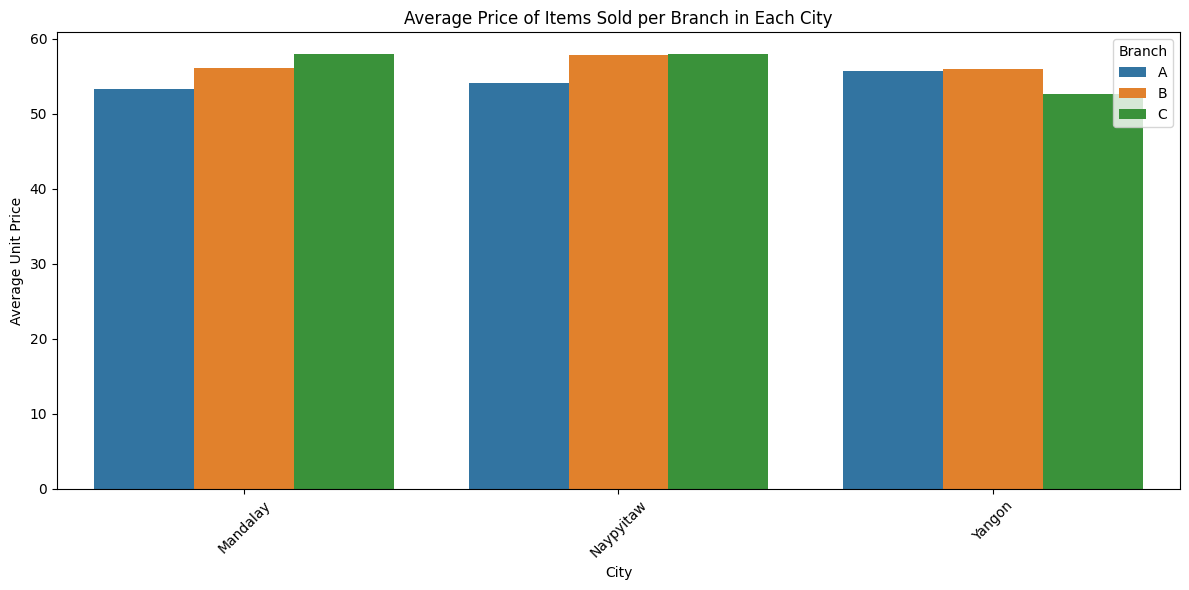

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_per_branch_city, x='City', y='Average Unit Price', hue='Branch')
plt.title("Average Price of Items Sold per Branch in Each City")
plt.xlabel("City")
plt.ylabel("Average Unit Price")
plt.legend(title="Branch")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
df[['Date', 'Month']].head()


,Date,Month
0,2019-01-05,2019-01
1,2019-03-08,2019-03
2,2019-03-03,2019-03
3,2019-01-27,2019-01
4,2019-02-08,2019-02


In [44]:
#  Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method.

monthly_sales_by_product = df.groupby(['Month','Gender','Payment','Product line'])['Total'].sum().reset_index()
print("Monthly Sales:")
print(monthly_sales_by_product)


Monthly Sales:
       Month  Gender  Payment            Product line    Total
0    2019-01  Female     Cash  Electronic accessories  2731.86
1    2019-01  Female     Cash     Fashion accessories  3845.24
2    2019-01  Female     Cash      Food and beverages  5197.05
3    2019-01  Female     Cash       Health and beauty   878.27
4    2019-01  Female     Cash      Home and lifestyle  3618.80
..       ...     ...      ...                     ...      ...
103  2019-03    Male  Ewallet     Fashion accessories  2486.70
104  2019-03    Male  Ewallet      Food and beverages  2996.20
105  2019-03    Male  Ewallet       Health and beauty  3841.42
106  2019-03    Male  Ewallet      Home and lifestyle  3200.86
107  2019-03    Male  Ewallet       Sports and travel  4930.61

[108 rows x 5 columns]


In [34]:

df["Month"] = pd.to_datetime(df['Date']).dt.to_period('M')

# Revenue
df['Revenue'] = df["Quantity"] * df["Unit price"]

# Monthly analysis
monthly_analysis = df.groupby(["Month", "Product line", "Gender", "Payment"]).agg(
    Quantity=('Quantity', "sum"),
    Revenue=('Revenue', "sum")
).reset_index()

# Top performing categories
top_categories = monthly_analysis.groupby("Product line").agg(
    Quantity=('Quantity', "sum"),
    Revenue=('Revenue', "sum")
).sort_values(by='Revenue', ascending=False)

# Gender-based insights
gender_insights = monthly_analysis.groupby('Gender').agg(
    Quantity=('Quantity', 'sum'),
    Revenue=('Revenue', 'sum')
)

# Payment method analysis
payment_method_analysis = monthly_analysis.groupby("Payment").agg(
    Quantity=('Quantity', 'sum'),
    Revenue=('Revenue', 'sum')
)

# Low performing categories
low_performing_categories = monthly_analysis.groupby("Product line").agg(
    Quantity=('Quantity', 'sum'),
    Revenue=('Revenue', 'sum')
).sort_values(by="Revenue").head(3)

print("Top Performing Categories:")
print(top_categories)
print("\nGender-based Insights:")
print(gender_insights)
print("\nPayment Method Analysis:")
print(payment_method_analysis)
print("\nLow Performing Categories:")
print(low_performing_categories)


Top Performing Categories:
                        Quantity   Revenue
Product line                              
Food and beverages           952  53471.28
Sports and travel            920  52497.93
Electronic accessories       971  51750.03
Fashion accessories          902  51719.90
Home and lifestyle           911  51297.06
Health and beauty            854  46851.18

Gender-based Insights:
        Quantity    Revenue
Gender                     
Female      2869  159888.50
Male        2641  147698.88

Payment Method Analysis:
             Quantity    Revenue
Payment                         
Cash             1896  106863.40
Credit card      1722   95968.64
Ewallet          1892  104755.34

Low Performing Categories:
                     Quantity   Revenue
Product line                           
Health and beauty         854  46851.18
Home and lifestyle        911  51297.06
Fashion accessories       902  51719.90


In [ ]:
#  average sales by gender and city
demographic_sales = df.groupby(['Gender', 'City'])['Total'].mean().reset_index()

# gender and city for targeted insights
print("Sales by Gender and City:")
print(demographic_sales)


Sales by Gender and City:
   Gender       City       Total
0  Female   Mandalay  311.159877
1  Female  Naypyitaw  330.045281
2  Female     Yangon  315.108944
3    Male   Mandalay  298.427882
4    Male  Naypyitaw  310.369800
5    Male     Yangon  281.623855


In April 2019, it is recommended to focus sales efforts on the cities of Mandalay and Naypyitaw, as they demonstrate strong performance among both genders. Female sales in Naypyitaw lead at 330.05, indicating a robust market potential, while male sales in Mandalay are also competitive at 298.43. Strategies should be tailored to leverage these strengths, such as targeted marketing campaigns or promotional events that resonate with the local demographics. Additionally, exploring the unique preferences of consumers in Yangon could uncover untapped opportunities, particularly as female sales in this city are relatively high at 315.11. Overall, emphasizing engagement in Mandalay and Naypyitaw while monitoring trends in Yangon could optimize sales outcomes.

In [ ]:
# Popular Product Combinations for Bundling
popular_combinations = df.groupby(['Invoice ID', 'Product line']).size().reset_index(name='Count')
popular_combinations = popular_combinations.groupby('Product line')['Count'].sum().reset_index()
popular_combinations = popular_combinations.sort_values(by='Count', ascending=False)

print("Popular Product Combinations for Bundling:")
print(popular_combinations.head())


Popular Product Combinations for Bundling:
             Product line  Count
1     Fashion accessories    178
2      Food and beverages    174
0  Electronic accessories    170
5       Sports and travel    166
4      Home and lifestyle    160


For April 2019, a strategic bundling approach can focus on the most popular product combinations from our analysis. Given the high demand for fashion accessories (178), food and beverages (174), and electronic accessories (170), we should create attractive bundles that incorporate these categories. For instance, a "Spring Essentials" bundle could combine trendy fashion accessories with gourmet snacks and must-have electronic gadgets, appealing to customers looking for stylish yet practical purchases. Additionally, integrating sports and travel items (166) into our promotions would attract outdoor enthusiasts gearing up for spring adventures. By leveraging these popular combinations, we can enhance customer satisfaction and drive sales effectively.

In [ ]:
# Best Selling Product Lines for Promotion
best_sellers = df.groupby('Product line')['Total'].sum().reset_index()
best_sellers = best_sellers.sort_values(by='Total', ascending=False)

print("Best-Selling Product Lines for Promotion:")
print(best_sellers.head())


Best-Selling Product Lines for Promotion:
             Product line     Total
2      Food and beverages  53471.28
5       Sports and travel  52497.93
0  Electronic accessories  51750.03
1     Fashion accessories  51719.90
4      Home and lifestyle  51297.06


For April 2019, the best promotion strategy would focus on the Food and Beverages product line, which generated a total of $53,471.28, making it the highest-selling category. Capitalizing on seasonal trends and upcoming holidays, such as Easter, can significantly boost sales. A well-crafted campaign that highlights special offers or discounts on popular food items can attract more customers. Additionally, pairing food products with complimentary items from the Sports and Travel line could entice shoppers planning for outdoor activities. Incorporating social media marketing and engaging content will further enhance visibility and drive customer interest. Overall, prioritizing Food and Beverages while leveraging cross-promotions will optimize sales potential for the month.








**These are the key areas to prioritize in April 2019 to drive improved sales performance.**

**Promote High-Demand Product Bundles**: Leverage popular combinations by creating attractive bundles that include food and beverages, fashion accessories, and electronic accessories. A "Spring Essentials" bundle can appeal to customers looking for stylish and practical purchases, while also incorporating sports and travel items to attract outdoor enthusiasts.

**Target Key Cities for Sales Efforts**: Focus marketing strategies in Mandalay and Naypyitaw, where there is strong performance in sales, particularly among women in Naypyitaw and competitive male sales in Mandalay. Tailor campaigns to resonate with local demographics to maximize engagement and sales potential.

**Utilize Seasonal Trends and Promotions**: Capitalize on seasonal trends, such as Easter, to boost sales of food and beverages through special offers and discounts. Incorporating social media marketing and engaging content will enhance visibility and drive customer interest during this peak shopping period.

**2. App Exploration: Explore the features and user experience of the Jar app. Identify two aspects that you think could be significantly improved and explain your reasoning behind each suggestion.**

***1. Interactive Tutorial for Feature Exploration:

 *** The Jar app offers a multitude of features, but some users may overlook them, leading to a suboptimal experience. Implementing a quick and interactive tutorial for new users canaddress this issue by guiding them through the various features of the app.

Reason::

*** By providing acomprehensive overview, users can explore all aspects of the app without missing any keyfunctionalities, enhancing their overall experience and satisfaction.

*** 2. Improvement::

*** The left sliding menu should have the ability to be closed with sliding and should have a closing button as a UX improvements.

Reason::

 *** I am supporting my first statement by daily driving different app and have seen people more often swipe. And for the closing button it is like for an age group of 45-60 you should provide a closing button.

Improvement::

*** In the view profile section swipe to change from profile to settings and vice versa. This thing also exists in Transaction section from Gold to Winnings.

Reason::

*** For the second point the reason is kind of same as above point that people often prefer to swipe instead of touching it.


**3. Product Optimisation**:

The Jar app has an engagement feature called 'Spin to Win'.
Right now, if 100 people come to the app each day, only 23 of them try out this spinning game. But, we know that people who spin are more likely to retain on the app and do transactions.

Now, we want to get more people to play the game. So, the question is, how can we make sure that at least 50 people out of every 100 who visit the app each day will play 'Spin to Win'? What can we do to get more people interested in spinning the wheel?

 **ANSWER**

• **Make it flashy!** Add some cool graphics or animations when you spin the wheel. People love shiny things, you know?

• **Offer better prizes!** Who wouldn't want to win something awesome? Maybe even free stuff or discounts on stuff they actually want to buy.

• **Show people what they're missing!** Maybe add a little pop-up that shows what other people have won. A little FOMO (fear of missing out) can go a long way.

• **Give everyone a free spin every day!** You gotta give people a taste of the fun to get them hooked.

A well-timed pop-up for the spin-the-wheel game can be introduced. By experimentingwith different scenarios, we can figure out the perfect timing for displaying the pop-up.This way, we can make sure users are encouraged to interact with the feature at just theright moment, maximizing their engagement